# Рубежный контроль №2

### Бессонова Ксения ИУ5-61Б

## Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

- Метод №1: Линейная/логистическая регрессия
- Метод №2: Случайный лес

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Загрузка датасета
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Предобработка данных 

In [4]:
#Проверка типов данных
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
#Размер датасета
data.shape

(1025, 14)

In [6]:
#Проверка пустых значений
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

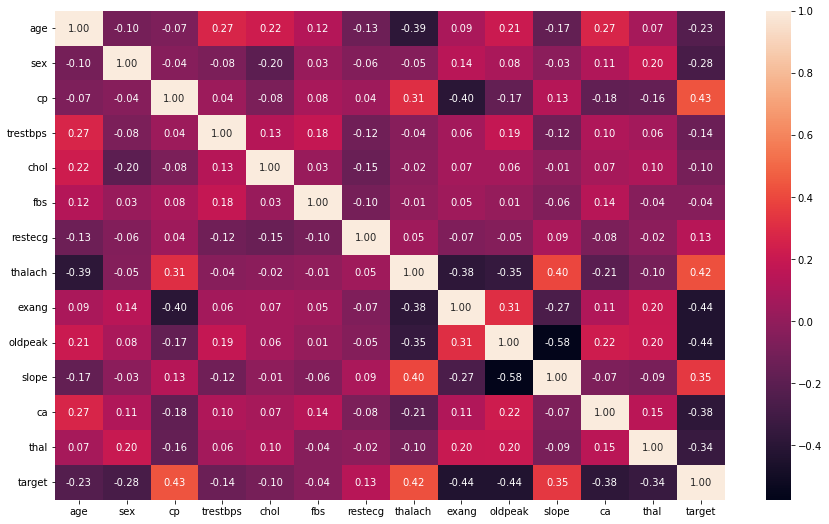

In [7]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f")

В качестве целевого признака возьмём столбец "target"

In [8]:
#Разделение выборки на обучающую и тестовую
target = "target"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Логистическая регрессия

In [9]:
LR = LogisticRegression()
LR.fit(trainX, trainY)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Для оценки качества будем использовать метрики balanced_accuracy_score и precision_score

In [10]:
BAS_LR = balanced_accuracy_score(testY, LR.predict(testX))
PS_LR = precision_score(testY, LR.predict(testX))

In [11]:
print("Оценка качества модели с метрики balanced_accuracy_score: {}".format(BAS_LR))
print("и метрики precision_score: {}".format(PS_LR))

Оценка качества модели с метрики balanced_accuracy_score: 0.8142679663608563
и метрики precision_score: 0.7522123893805309


С помощью используемых метрик, можем сделать вывод, о неплохом качестве модели.

### Случайный лес

In [12]:
RF = RandomForestClassifier(n_estimators=10, random_state=1)
RF.fit(trainX, trainY)

RandomForestClassifier(n_estimators=10, random_state=1)

In [13]:
BAS_RF = balanced_accuracy_score(testY, RF.predict(testX))
PS_RF = precision_score(testY, RF.predict(testX))

In [14]:
print("Оценка качества модели с метрики balanced_accuracy_score: {}".format(BAS_RF))
print("и метрики precision_score: {}".format(PS_RF))

Оценка качества модели с метрики balanced_accuracy_score: 0.9895833333333333
и метрики precision_score: 1.0


В данном случае, можем увидеть, что ансамблевая модель случайного леса предсказывает с высокой точностью значения целевого признака, в отличие от модели логистической регрессии. Таким образом модель случайного леса превосходно решает задачу классификации.